In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#from sklearn.mixture import GaussianMixture

Leer los datos del primer dataframe

In [235]:
data = pd.read_csv("diamonds.csv", index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


¿Cuantos registros tengo en total?

In [152]:
data.shape[0]

53930

¿Que tipo de valores contiene cada columna?

In [153]:
data.info()
#respuesta, tenemos valores del tipo float64(6), int64(1), object(3)*(string)

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    50968 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        52840 non-null  float64
 8   y        53345 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


## Variables Cuantitativas

### *cut*

¿Que valores existen en *cut*?

In [154]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'Very Goo!d',
       "P*'remium", 'I#deal', '#Very Good', 'P?remium', "*'Ideal",
       '!Good', 'Pre!mium', 'Pr?emium', 'Very Go#od', 'Ide&al', 'Ide!al',
       'Id!eal', '&Premium', 'Go?od', 'G#ood', "Very *'Good", "Ide*'al",
       'V&ery Good', '&Ideal', 'Very G#ood'], dtype=object)

Existen varios errores de escritura sobre la calidad del corte, entonces debemos estandarizar dichas variables

In [155]:
Quality = {"Premium":   set(["Premium","P*remium","Pr?emium","P?remium", "Pre!mium", "&Premium", "P*'remium"]),
           "Very Good": set(["Very Good", "Very Goo!d", "Very *'Good", "V&ery Good", "Very G#ood", "#Very Good", "Very Go#od"]),
           "Good":      set(["Good", "!Good", "Go?od", "G#ood"]),
           "Ideal":     set(["&Ideal", "Ide*'al", "Ide&al","I#deal", "Ideal", "I#deal", "Id!eal", "*'Ideal", "Ide!al"]),
           "Fair":      set(["Fair"])}

map_qty = lambda x: next((k for k, v in Quality.items() if x in v), x)
data["Cut"] = data['cut'].apply(map_qty)

Visualizar la distribucion por Calidad de corte

<Axes: >

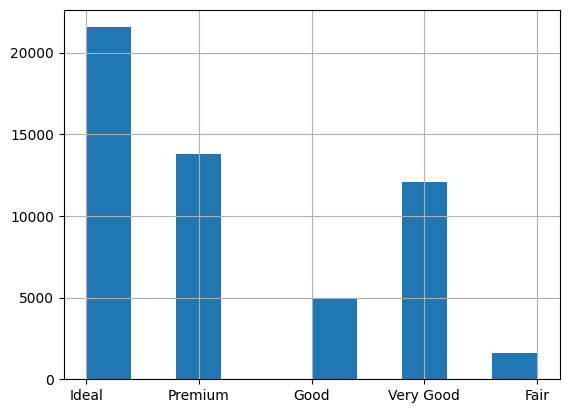

In [156]:
#data["Cut"].unique() #verificar que ya no falta un error
data["Cut"].hist()

### *color*

In [157]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', "*'E", '#F', '&G', '!H', '?J',
       '#D', '&I', '!I', '?G', '#H', '?H', '?E', "*'F", '!E', '&F', '#G',
       "*'I", '!F', '&E'], dtype=object)

Igual que en el anterior, notamos que existe ruido en la informacion de entrada

In [158]:
Color = {"D": set(["D", "#D"]),
         "E": set(["E","*'E", "?E", "!E", "&E"]),
         "F": set(["F","#F","*'F", "&F", "!F"]),
         "G": set(["G", "&G", "?G", "#G"]),
         "H": set(["H", "!H", "#H", "?H"]),
         "I": set(["I","&I", "!I", "*'I"]),
         "J": set(["J", "?J"])
            }

In [159]:
map_color = lambda x: next((k for k, v in Color.items() if x in v), x)
data["Color"] = data['color'].apply(map_color)

Visualizar por color

<Axes: >

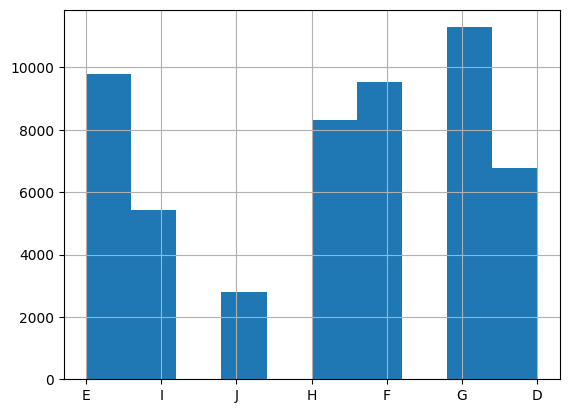

In [160]:
data["Color"].hist()

### *clarity*

In [161]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', 'S?I1',
       'SI!1', '&VS2', '&SI2', "S*'I1", 'VS?1', "S*'I2", '#VS1', 'V&S2',
       'V!S2', '!VS2', 'VS#2', "VVS*'2", "*'SI2", 'VV?S1', 'S&I1',
       "*'SI1", 'SI?1', 'VV#S1', 'V#S2', '#SI!1', 'S!I2'], dtype=object)

In [162]:
Clarity = {
    "I1": set(["I1"]), 
    "SI2": set(["SI2","&SI2", "S*'I2", "*'SI2", "S!I2"]), 
    "SI1": set(["SI1", "S?I1", "SI!1", "S*'I1", "S&I1", "*'SI1", "SI?1", "#SI!1"]), 
    "VS2": set(["VS2", "&VS2", "V&S2", "V!S2", "!VS2", "VS#2", "V#S2"]), 
    "VS1": set(["VS1","VS?1", "#VS1"]), 
    "VVS2": set(["VVS2","VVS*'2"]), 
    "VVS1": set(["VVS1", "VV?S1", "VV#S1"]), 
    "IF": set(["IF"])}

In [163]:
map_clarity = lambda x: next((k for k, v in Clarity.items() if x in v), x)
data["Clarity"] = data['clarity'].apply(map_clarity)

In [164]:
#data["Color"].unique() #para corroborar que cada valor es ya unico
data["Clarity"].unique()


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<Axes: >

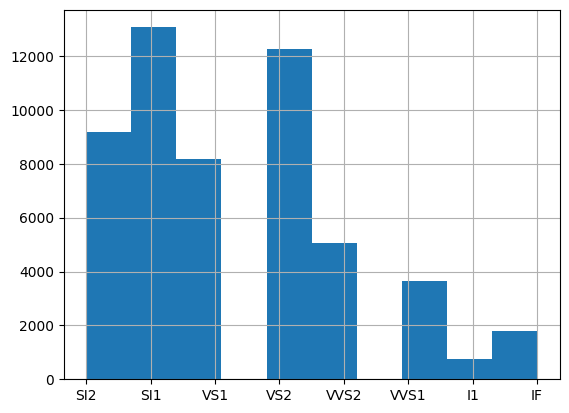

In [165]:

data["Clarity"].hist()

In [166]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,Cut,Color,Clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium,E,SI1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good,E,VS1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium,I,VS2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good,J,SI2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal,D,SI1
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good,D,SI1
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Good,D,SI1
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Premium,H,SI2


Tenemos variables cualitativas, pero es necesario convertirtas el variables cuantitativas, 

In [167]:
data_cut = data["Cut"]

data_cut.to_csv("Cut.csv")

### BETO for embedding
Para realizar el embedding usaremos como primer alternativa el modelo de BETO, donde solo tendremos las primeras 2 columnas

In [168]:
#import torch
#import transformers as ppb

In [169]:
#model_class = ppb.DistilBertModel
#tokenizer_class = ppb.DistilBertTokenizer
#pretrained_weights = 'dccuchile/bert-base-spanish-wwm-uncased'

In [170]:
#tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
#model = model_class.from_pretrained(pretrained_weights)

usaremos las 2 palabras (maximo) que describen el elemento

In [171]:
#batch_1 = data["Cut"]
#tokenized = data["Cut"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True,max_length =7)))

In [172]:
#max_len = 0
#for i in tokenized.values:
#    if len(i) > max_len:
#        max_len = len(i)
#
#padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [173]:
#np.array(padded).shape

Crear mascara de atencion

In [174]:
#attention_mask = np.where(padded != 0, 1, 0)
#attention_mask.shape

Aplicamos el modelos de bert

In [175]:
#input_ids = torch.tensor(padded)
#attention_mask = torch.tensor(attention_mask)
#
#with torch.no_grad():
#    last_hidden_states = model(input_ids, attention_mask=attention_mask)

Usaremos unicamente la primer capa (correspodiente al token CLS)

In [176]:
#features = last_hidden_states[0][:,0,:].numpy()

Almacenamos estos resultados en un archivo .csv

In [177]:
#features_df = pd.DataFrame(features)
#features_df.to_csv('BERT_Cut.csv')

In [178]:
#from sklearn.model_selection import train_test_split

#from sklearn.decomposition import PCA

#train_features, test_features, train_labels, test_labels = train_test_split(features, labels)
#pca = PCA(n_components=2)
#pca.fit(df)
#datared=pca.transform(df)
#
#import plotly.express as px
#fig = px.scatter(datared, x=0, y=1, color=tr_y)
#fig.show()
#

### Embeding en base a una categoria

Sabemos lo siguiente:
* *colour*: diamond colour, from J (worst) to D (best)
* *clarity*: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* *cut:* quality of the cut (Fair, Good, Very Good, Premium, Ideal)

In [179]:
#diccionario donde se describe el valor por el cual sera cambiado
Color_cat   = {"J": 1,"I":2, "H":3, "G":4, "F":5, "E":6, "D":7}
Clarity_cat ={"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}
Cut_cat     = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}

In [180]:
#realizar el cambio de palabra a numero
data["Cut_num"] = data['Cut'].map(Cut_cat)
data["Clarity_num"] = data['Clarity'].map(Clarity_cat)
data["Color_num"] = data['Color'].map(Color_cat)

dataframe editado para las variables categoricas

In [181]:
df =  data[["carat", "depth", "table", "price", "x", "y", "z", "Cut_num", "Clarity_num", "Color_num"]]
df.head(5)

,carat,depth,table,price,x,y,z,Cut_num,Clarity_num,Color_num
0,0.23,61.5,55.0,326,3.95,3.98,2.43,5,2,6
1,0.21,59.8,61.0,326,3.89,3.84,2.31,4,3,6
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,5,6
3,0.29,62.4,58.0,334,4.20,4.23,2.63,4,4,2
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,1


## Valores faltantes


¿Que columnas contienen valores faltantes?

In [182]:
#df = data
#df[df.isnull().any(axis=1)]
missing_count = df.isnull().sum()
missing_count

carat             0
depth          2962
table             0
price             0
x              1090
y               585
z                 0
Cut_num           0
Clarity_num       0
Color_num         0
dtype: int64

Como se ven la cantidad de registros faltantes?

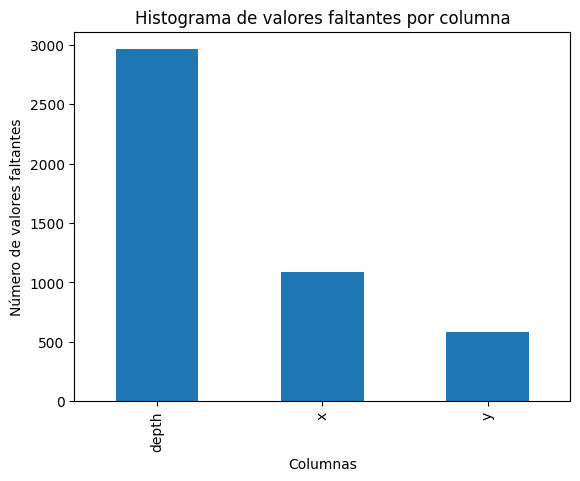

In [183]:
missing_count = missing_count[missing_count > 0]

# Crear un histograma de las columnas con valores faltantes
missing_count.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Número de valores faltantes')
plt.title('Histograma de valores faltantes por columna')
plt.show()

¿Cuantos registros completos se tienen?

In [184]:
df_clean =  df.dropna()
df_clean.shape
#respuesta: 50968

(50968, 10)

In [185]:
##registros con al menos un valor nulo
print("Existen {} registros con al menos un valor faltante".format(data.shape[0] - df_clean.shape[0]))
#Por complemento, tenemos 2962 registros con al menos un valor nulo.

Existen 2962 registros con al menos un valor faltante


**Hipotesis** Los valores de *depth* satisfacen la siguiente ecuacion: $\frac{z}{mean(x, y)}$

In [186]:
#se programa esto con el df_clean
depth_prop = round(df_clean["z"] / df_clean.loc[:, ['x', 'y']].mean(axis=1)*100, 1)
df_clean["depth_prop"] = depth_prop

C:\Users\pedro\AppData\Local\Temp\ipykernel_13932\3322390280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["depth_prop"] = depth_prop


¿Cuantos valores cumplen exactamente esta ecuacion?

In [187]:
df_clean.shape[0] - (df_clean["depth"] != df_clean["depth_prop"]).sum()
#respuesta: 47378 (92.95%) del total de 50968
47378*100/50968 #% de valores que si coinciden

92.95636477789986

¿Que pasa con los valores restantes?

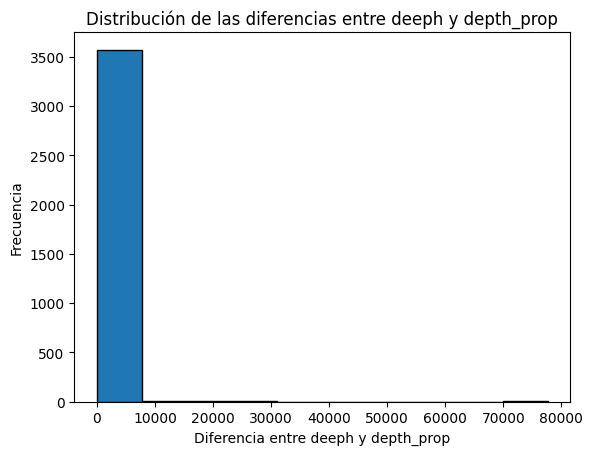

In [188]:
diferencias = df_clean["depth"] - df_clean["depth_prop"]

# Filtrar las diferencias que no son cero
diferencias_no_cero = diferencias[diferencias != 0]
abs_diff = [abs(val) for val in diferencias_no_cero]
# Graficar el histograma de las diferencias
plt.hist(abs_diff, edgecolor='black')
plt.xlabel('Diferencia entre deeph y depth_prop')
plt.ylabel('Frecuencia')
plt.title('Distribución de las diferencias entre deeph y depth_prop')
plt.show()

Y en % de diferencias con respecto al valor absoluto, como se ve esto?

In [189]:
array_np = np.array(abs_diff)

bordes = [0, 1, 10, 100, 10000]

# Contamos cuántos elementos están en cada intervalo
conteos, _ = np.histogram(array_np, bins=bordes)

print("Elementos en el intervalo [0,1):", conteos[0])
print("Elementos en el intervalo [1,10):", conteos[1])
print("Elementos en el intervalo [11,100):", conteos[2])
print("Elementos en el intervalo [100,10000):", conteos[3])

Elementos en el intervalo [0,1): 3480
Elementos en el intervalo [1,10): 59
Elementos en el intervalo [11,100): 30
Elementos en el intervalo [100,10000): 5


In [190]:
5*100/50968 #% de valores que si coinciden

0.009810076911002982

**Conclusion**

Esta hipotesis de la formula la aceptaremos como valida. De esta manera podremos hacer el primer inputacion de los datos que si tienen *x,y,z* pero no *depth*

### Eliminar registros que difieren de 1 entre depth y depth_propuesta

In [191]:
df_filtrado = df_clean[abs(df_clean['depth'] - df_clean['depth_prop']) <= 1]

¿Cuantos registros tiene este nuevo dataframe?

In [192]:
df_filtrado.shape[0]
#respuesta, 50868

50868

## Inputacion

De los 2,962 registros con al menos un valor, se investigaran aquellos casos donde la informacion faltante este en 1,2 o los 3 columnas.
Aclaracion, se hizo cada una de las busquedas, hasta llegar unicamente a los registros que se describen a continuacion 

### Caso I (Falta unicamente depth)

Primer input para la columna *depth*

In [193]:
df_missing_depth = df[df['depth'].isna() & ~df['x'].isna() & ~df['y'].isna() & ~df['z'].isna()]

¿Cuantos registros puedo inputar  con este primer metodo?

In [194]:
df_missing_depth.shape[0]
#respuesta: 1872

1872

¿Que % representa del total de registros con al menos un valor nulo?

In [195]:
1872*100/2962 
#respuesta: 63%

63.20054017555706

Realizar la imputacion de los datos

In [196]:
depth_input = round(df_missing_depth["z"] / df_missing_depth.loc[:, ['x', 'y']].mean(axis=1)*100, 1)
df_missing_depth["depth"] = depth_input

C:\Users\pedro\AppData\Local\Temp\ipykernel_13932\3046040852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_depth["depth"] = depth_input


¿Cuantos datos me faltan por realizar una inputacion de valores?

Gracias al primer metodo, tenemos  una recuperacion del 63.2% de datos faltantes
Los 1872 datos faltantes representan el 26.8% de los datos faltantes, pero solo el 3.4 % de la muestra total  (53,930)

### Caso V (Falta *x* y *depth*)

In [197]:
df_missing_depth_x = df[df['depth'].isna() & df['x'].isna() & ~df['y'].isna() & df['depth'].isna()]

print(df_missing_depth_x.shape[0])
df_missing_depth_x.head()

505


,carat,depth,table,price,x,y,z,Cut_num,Clarity_num,Color_num
188,0.71,NaN,57.0,2777,NaN,5.69,3.56,3,4,5
302,0.82,NaN,54.0,2799,NaN,6.02,3.74,5,2,5
372,0.73,NaN,57.0,2808,NaN,5.70,3.61,3,3,7
509,0.70,NaN,54.0,2822,NaN,5.71,3.52,5,3,7
538,0.79,NaN,58.0,2827,NaN,5.90,3.71,4,6,3


¿Como hacer la imputacion? Como $depth =\frac{z}{mean(x, y)}$, y si conocemos *z, y*, solo es encesario imputar estadisticamente el valor de *x*. Esto lo haremos a travez de imputacion de la media, sobre los *k* vecinos mas cercanos

In [198]:
df_filtrado = df_filtrado.drop(columns=['depth_prop']) #eliminamos la columna auxiliar
df_complet = pd.concat([df_filtrado, df_missing_depth]) 
df_pre_imput = pd.concat([df_complet,df_missing_depth_x])

¿Que valor de K es mejor?

Para esto es importante estandarizar los datos primero

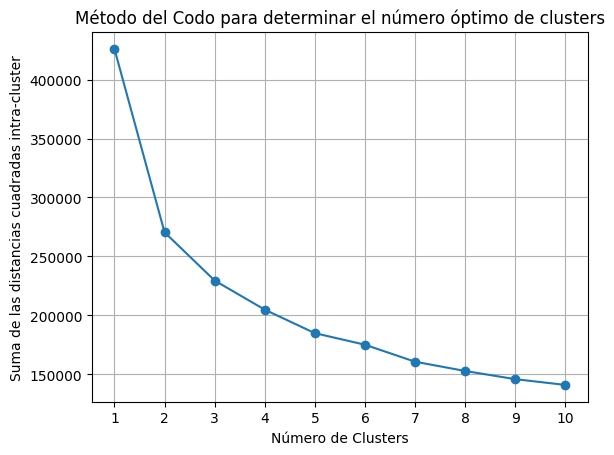

In [199]:
n_clusters_range = range(1, 11)  # Probamos con 1 a 10 clusters
inertia_values = []
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pre_imput.drop(columns=['x',"depth" ]))

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Graficamos la suma de las distancias cuadradas intra-cluster en función del número de clusters
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de las distancias cuadradas intra-cluster')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

Seleccionamos k=5

In [200]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pre_imput.drop(columns=['x',"depth" ]))
kmeans = KMeans(n_clusters=5, random_state=0)
df_pre_imput['cluster'] = kmeans.fit_predict(scaled_features)

Calculo de la media de x por grupo

In [201]:
cluster_means = df_pre_imput.groupby('cluster')['x'].mean()
df_pre_imput['x_imputed'] = df_pre_imput.apply(lambda row: cluster_means[row['cluster']] if np.isnan(row['x']) else row['x'],axis=1)

obtenemos unicamente los registros alos que se les aplicara la imputacion

In [211]:
df_imput = df_pre_imput[df_pre_imput.isna().any(axis=1)]
df_imput.head()

,carat,depth,table,price,x,y,z,Cut_num,Clarity_num,Color_num,cluster,x_imputed
188,0.71,NaN,57.0,2777,6.208395,5.69,3.56,3,4,5,0,6.208395
302,0.82,NaN,54.0,2799,6.475409,6.02,3.74,5,2,5,2,6.475409
372,0.73,NaN,57.0,2808,6.208395,5.70,3.61,3,3,7,0,6.208395
509,0.70,NaN,54.0,2822,4.815557,5.71,3.52,5,3,7,4,4.815557
538,0.79,NaN,58.0,2827,6.475409,5.90,3.71,4,6,3,2,6.475409


realizamos la immputacion

In [212]:
cluster_means = df_imput.groupby('cluster')['x'].mean()
df_imput['x_imputed'] = df_imput.apply(lambda row: cluster_means[row['cluster']] if np.isnan(row['x']) else row['x'],axis=1)

C:\Users\pedro\AppData\Local\Temp\ipykernel_13932\658228079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput['x_imputed'] = df_imput.apply(lambda row: cluster_means[row['cluster']] if np.isnan(row['x']) else row['x'],axis=1)


eliminamos la columna auxiliar

In [221]:
df_imput['x'] = df_imput['x'].fillna(df_imput['x_imputed'])
df_imput.drop(columns=['x_imputed'], inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_13932\3441698076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput['x'] = df_imput['x'].fillna(df_imput['x_imputed'])
C:\Users\pedro\AppData\Local\Temp\ipykernel_13932\3441698076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput.drop(columns=['x_imputed'], inplace=True)


Ahora realizamos la imputacion de depth

In [222]:

depth_input = round(df_imput["z"] / df_imput.loc[:, ['x', 'y']].mean(axis=1)*100, 1)
df_imput["depth"] = depth_input
df_imput.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_13932\819147829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput["depth"] = depth_input


,carat,depth,table,price,x,y,z,Cut_num,Clarity_num,Color_num,cluster
188,0.71,59.8,57.0,2777,6.208395,5.69,3.56,3,4,5,0
302,0.82,59.9,54.0,2799,6.475409,6.02,3.74,5,2,5,2
372,0.73,60.6,57.0,2808,6.208395,5.70,3.61,3,3,7,0
509,0.70,66.9,54.0,2822,4.815557,5.71,3.52,5,3,7,4
538,0.79,60.0,58.0,2827,6.475409,5.90,3.71,4,6,3,2


Agregamos esto al conjunto de datos ya completos

In [229]:
df_filtrado.shape[0]  #datos completos

50868

In [228]:
df_missing_depth.shape[0] ##caso I

1872

In [231]:
df_imput.shape[0] #faltan x e depth

505

### Caso VII (Taltan las 3)

Podriamos aplicar el proceso similar par imputar *y*y *x*

In [232]:
585*100/53930

1.0847394770999443

In [207]:
registros_con_valores_faltantes_y_z_depth = df[df['x'].isna() & df['y'].isna() & df['depth'].isna()]
registros_con_valores_faltantes_y_z_depth

,carat,depth,table,price,x,y,z,Cut_num,Clarity_num,Color_num
73,0.30,NaN,57.0,554,NaN,NaN,2.67,4,3,3
345,0.70,NaN,58.0,2804,NaN,NaN,3.56,3,3,7
544,0.80,NaN,54.0,2829,NaN,NaN,3.75,2,2,6
553,0.53,NaN,57.0,2830,NaN,NaN,3.20,5,7,5
592,0.70,NaN,56.0,2837,NaN,NaN,3.53,5,5,6
...,...,...,...,...,...,...,...,...,...,...
53611,0.35,NaN,60.0,552,NaN,NaN,2.78,4,5,2
53690,0.70,NaN,56.0,2717,NaN,NaN,3.51,5,4,5
53719,0.57,NaN,56.0,2722,NaN,NaN,3.25,5,6,5
53904,0.84,NaN,59.0,2753,NaN,NaN,3.77,2,5,2


In [208]:
585*100/2962

19.75016880486158

In [209]:
585+505+1872

2962